# CSCE 421 :: Machine Learning :: Texas A&M University :: Fall 2021

# Homework 5 (HW-5)
**Name:**  Nikita Udodenko
****Assigned Wed, Oct 27, due on Wed, Nov 10, by 11:59 PM.****

* Please finish your homework in this file with **Python**.
* For your submission please name the files with ***last name_first name_hw5_csce421***. No late submissions accepted unless you have slip days remaining.
* This is an individual assignment. While you are welcome to discuss general concepts together andon the discussion board your solutions must be yours and yours alone.
* SHOW YOUR WORK.

## Probem 1 
In this problem, we will process face images coming from the Yale Face Dataset:http://vision.ucsd.edu/content/yale-face-database.  This dataset contains images of the faces of 15 individ-uals.  For each individual there are 11 images taken under a variety of conditions e.g., the personmakes a happy expression, wears glasses etc.

(a) Download the dataset from the above URL.ImplementPrincipal Component Analysis (PCA)on the input images.  Assume that the input vector of PCA contains all rows of an image stackedone on top of the other.  You can use available libraries that calculate eigenvalues and eigenvectorsof a matrix.Hint:Don’t forget to normalize the data.

In [35]:
from PIL import Image
import numpy as np
import os
from sklearn.decomposition import PCA

directory = 'yalefaces'
image_array = []
for filename in os.scandir(directory):
    if filename.is_file():
        image = Image.open(filename.path)
        arr = np.array(image)
        norm = np.linalg.norm(arr)
        arr = arr / norm
        image_array.append(arr)
print("Image 0: ", image_array[0])
num_images = len(image_array)
shape = image_array[0].shape
print("The shape of images: ", shape)
matrix = np.zeros((shape[0] * shape[1], num_images))
for i in range(num_images):
    im = image_array[i].flatten()
    matrix[:,i] = im
matrix = matrix.T
print("The matrix: ", matrix)
print("The shape of matrix: ", matrix.shape)
mean_vector = np.mean(matrix, axis=0)
mean_vector.shape = (1, len(mean_vector))
print("The mean marix shape: ", mean_vector.shape)
eigenfaces = matrix - mean_vector
print("Eigenfaces shape: ", eigenfaces.shape)

pca = PCA(n_components = 166, svd_solver = "full")
pca.fit(eigenfaces)
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
print("Eigenvalues shape: ", eigenvalues.shape)
print("Eigenvectors shape: ", eigenvectors.shape)

Image 0:  [[0.00229765 0.00229765 0.00229765 ... 0.00450694 0.00450694 0.00450694]
 [0.00450694 0.00450694 0.00450694 ... 0.00450694 0.00450694 0.00450694]
 [0.00450694 0.00450694 0.00450694 ... 0.00450694 0.00450694 0.00450694]
 ...
 [0.00450694 0.00450694 0.00450694 ... 0.00450694 0.00450694 0.00450694]
 [0.00450694 0.00450694 0.00450694 ... 0.00450694 0.00450694 0.00450694]
 [0.00120185 0.00120185 0.00120185 ... 0.00120185 0.00120185 0.00120185]]
The shape of images:  (243, 320)
The matrix:  [[0.00229765 0.00229765 0.00229765 ... 0.00120185 0.00120185 0.00120185]
 [0.00218308 0.00218308 0.00218308 ... 0.00114192 0.00114192 0.00114192]
 [0.00218308 0.00218308 0.00218308 ... 0.00114192 0.00114192 0.00114192]
 ...
 [0.00226359 0.00226359 0.00226359 ... 0.00118403 0.00118403 0.00118403]
 [0.00228983 0.00228983 0.00228983 ... 0.00119775 0.00119775 0.00119775]
 [0.00221333 0.00221333 0.00221333 ... 0.00115774 0.00115774 0.00115774]]
The shape of matrix:  (166, 77760)
The mean marix shape:

(b) Plot a curve displaying the first k eigenvaluesλ1,...,λK, i.e.  the energy of the first K principalcomponents.  How many components do we need to capture 50% of the energy?

To capture 50% of the energy we need 3 principal components


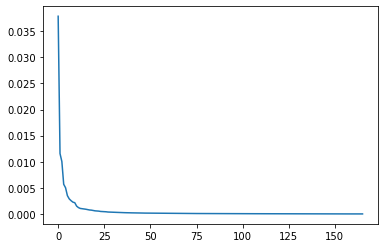

In [36]:
import matplotlib.pyplot as plt
k = 0
eigen_sum = np.sum(eigenvalues)
for i in range(len(eigenvalues)):
    if ((np.sum(eigenvalues[:i]) / eigen_sum) * 100) >= 50:
        k = i
        break
print("To capture 50% of the energy we need", k, "principal components")
plt.plot(eigenvalues)
plt.show()

(c) Plot the top 10eigenfaces, i.e.  the eigenvectorsuk,k= 1,...,10 obtained by PCA.

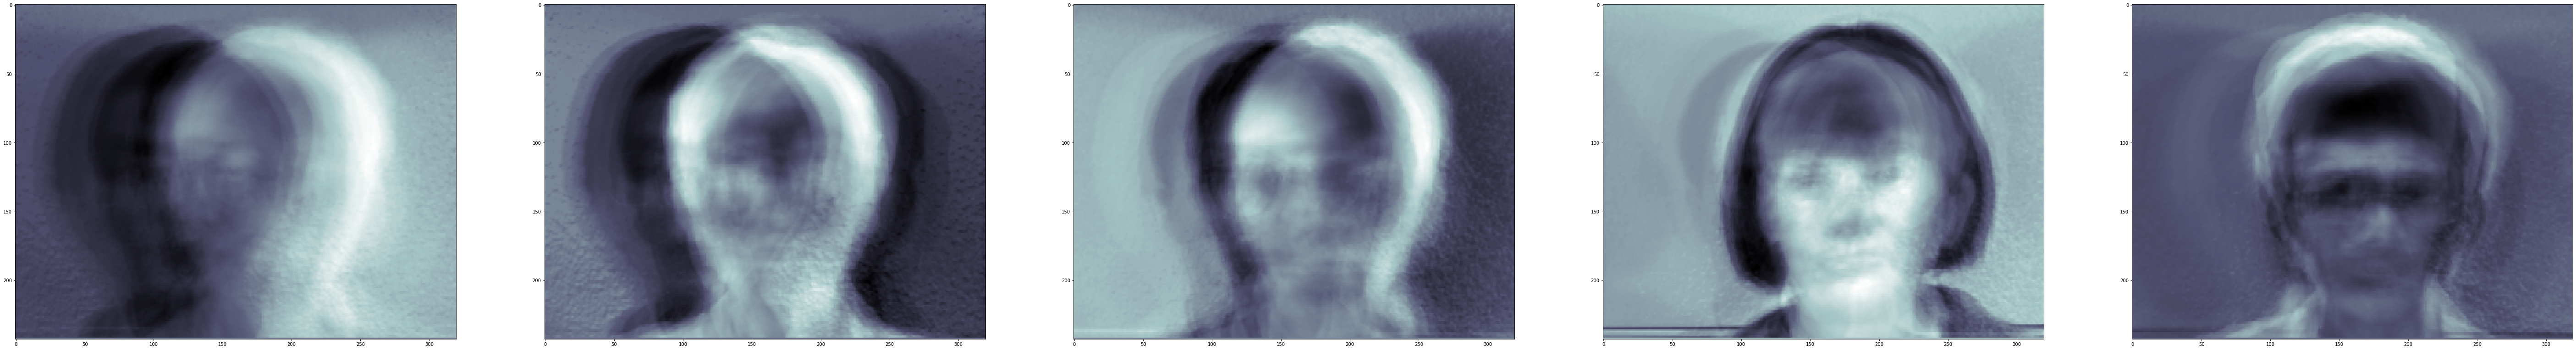

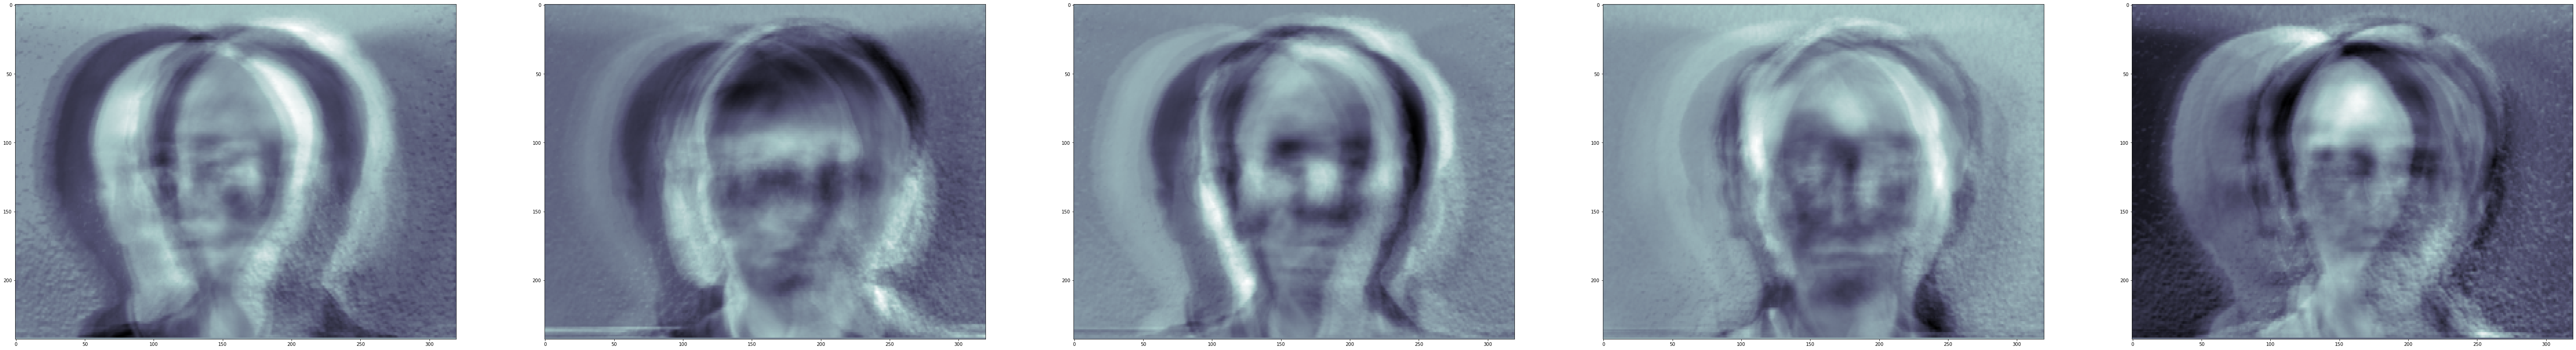

In [37]:
fig = plt.figure(figsize=(100, 100))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    img = ax.imshow(np.reshape(eigenvectors[i], shape), cmap=plt.cm.bone)
fig1 = plt.figure(figsize=(100, 100))
for i in range(5, 10):
    ax1 = fig1.add_subplot(1, 5, i-4)
    img1 = ax1.imshow(np.reshape(eigenvectors[i], shape), cmap=plt.cm.bone)

(d) Select a couple of images from the data.  Use the firstkeigenfaces as a basis to reconstructthe images.  Visualize the reconstructed images using 1, 10, 20, 30, 40, 50 components.  How manycomponents do we need to achieve a visually good result? Hint:Reconstruction of an input vectorxbased on the eigenvectorsu1,...,uKis given by thefollowing expressionx≈x0+∑Kk=1ckuk, whereck=uTkxis the projection of the input image tothektheigenvector.

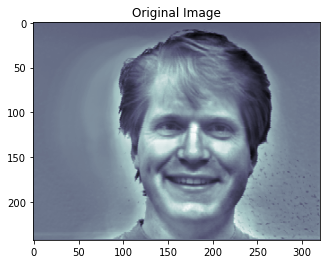

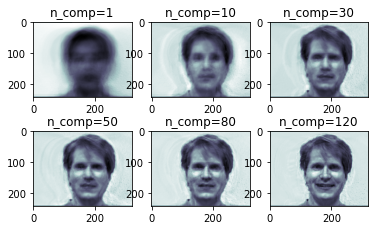

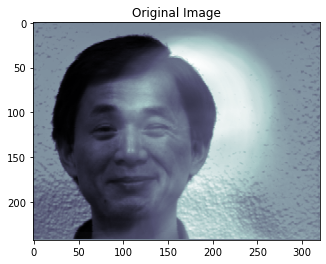

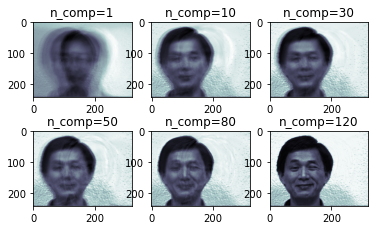

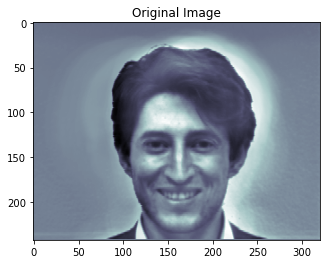

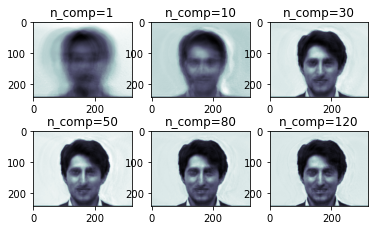

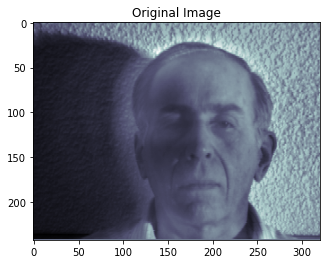

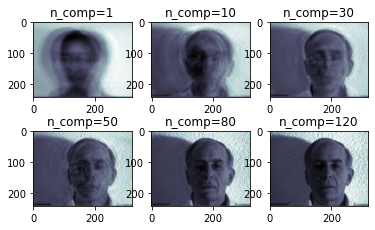

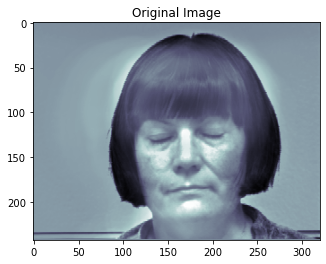

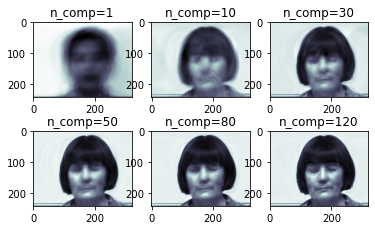

In [38]:
import matplotlib.pyplot as plt
import random

components = [1, 10, 30, 50, 80, 120]
for r in range(5):
    n = random.randint(0, 165)
    face = eigenfaces[n]
    face.shape = (face.shape[0], 1)
    plt.title("Original Image")
    plt.imshow(np.reshape(face, shape), cmap=plt.cm.bone)
    plt.show()
    i = 0
    for n_comp in components:
        i += 1
        plt.subplot(2,3,i)
        rec = np.dot(eigenvectors[:n_comp,:], face)
        reconstr = mean_vector + np.dot(eigenvectors[:n_comp,:].T, rec).T
        img = plt.imshow(np.reshape(reconstr, shape), cmap=plt.cm.bone)
        plt.title('n_comp=' + str(n_comp))
    plt.subplots_adjust(wspace=0.2, hspace=0.0)
    plt.show()

The image becomes better with increasing number of components. To achieve visually good results we need at least 80 components. 

(e)Perform face recognition:Split the input data into training and testingmaking sure that everyperson  is  included  in  each  set.  Use as input features the transformed feature space that resultedfrom PCA. Experiment with different number of PCA components through a 5-fold cross-validation.User  an  outer  5-fold cross-validation  to  build  predictors  using  support vector  machines  (using  aradial basis function kernel) and logistic regression with lasso regularization.  Report the recognitionaccuracy on the test set.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score

n_components = [1, 10, 20, 30, 40, 50]

directory = 'yalefaces'
y_labels = []
for filename in os.listdir(directory):
    y_labels.append(filename.split('.')[0].replace("subject", ""))
y_labels = np.array(y_labels)
y_labels.shape = ((166,1))

y = pd.DataFrame(y_labels)

for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(eigenfaces)
    data_faces = pca.transform(eigenfaces)
    x = pd.DataFrame(data_faces)
    
    skf = StratifiedKFold(n_splits = 5, shuffle = True)
    svm_arr = []
    log_arr = []
    for train, test in skf.split(x, y):
        x_train = x.iloc[train]
        x_test = x.iloc[test]
        y_train = y.iloc[train].values.ravel()
        y_test = y.iloc[test].values.ravel()

        clf = SVC(kernel = 'rbf')
        clf.fit(x_train, y_train)
        svm_arr.append(accuracy_score(y_test, clf.predict(x_test)))

        log = LogisticRegression(penalty = 'l1', solver = 'liblinear')
        log.fit(x_train, y_train)
        log_arr.append(accuracy_score(y_test, log.predict(x_test)))
    print("SVM", svm_arr)
    print("Logistic Regression", log_arr, '\n')

SVM [0.2647058823529412, 0.30303030303030304, 0.24242424242424243, 0.2727272727272727, 0.2727272727272727]
Logistic Regression [0.11764705882352941, 0.09090909090909091, 0.18181818181818182, 0.18181818181818182, 0.15151515151515152] 

SVM [0.6470588235294118, 0.6666666666666666, 0.696969696969697, 0.8181818181818182, 0.7272727272727273]
Logistic Regression [0.23529411764705882, 0.30303030303030304, 0.24242424242424243, 0.36363636363636365, 0.24242424242424243] 

SVM [0.8529411764705882, 0.8181818181818182, 0.696969696969697, 0.7272727272727273, 0.8181818181818182]
Logistic Regression [0.29411764705882354, 0.3333333333333333, 0.30303030303030304, 0.3333333333333333, 0.30303030303030304] 

SVM [0.7941176470588235, 0.9393939393939394, 0.7878787878787878, 0.7575757575757576, 0.696969696969697]
Logistic Regression [0.23529411764705882, 0.3939393939393939, 0.36363636363636365, 0.3333333333333333, 0.2727272727272727] 

SVM [0.8235294117647058, 0.696969696969697, 0.8484848484848485, 0.87878787